In [2]:
import librosa
#LibROSA is a python package for music and audio analysis
import librosa.display
import scipy.io.wavfile
#SciPy is a free and open-source Python library used for scientific computing and technical computing
import os
#This module provides a portable way of using operating system dependent functionality
import glob 
#Unix style pathname pattern expansion
import sys
#This module provides access to some variables used or maintained by the interpreter and to
#functions that interact strongly with the interpreter
import numpy as np
#Provides a large collection of high-level mathematical functions to operate on arrays
import pandas as pd
#Python library for data manipulation and analysis
import json
import matplotlib.pyplot as plt
#Used for plotting graphs
import tensorflow as tf
#Python library for dataflow and differentiable programming across a range of tasks
import keras
#Open-source neural-network library
from matplotlib.pyplot import specgram
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.utils import np_utils
from keras import regularizers
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
#Python library for machine learning


Bad key "text.kerning_factor" on line 4 in
C:\Users\Nishant\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


KeyError: "Couldn't find field google.protobuf.FieldDescriptorProto.proto3_optional"

In [2]:
mylist = os.listdir('RawData/')
#Gets list of audio files in RawData directory

# Plotting the audio file's waveform and its spectrogram

In [3]:
data, sampling_rate = librosa.load('RawData/03-01-01-01-01-01-01.wav')
#data is the audio time series
#sampling rate is sample per second
#default value of sampling_rate is 22050

Populating the interactive namespace from numpy and matplotlib


C:\Users\HP\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


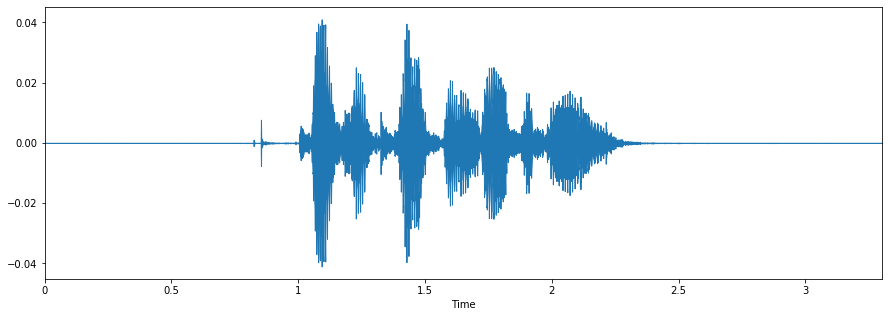

In [4]:
%pylab inline
plt.figure(figsize=(15, 5))
#used to provide size of width and height in inches
librosa.display.waveplot(data, sr=sampling_rate)
#plots the amplitude envelope of a waveform

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


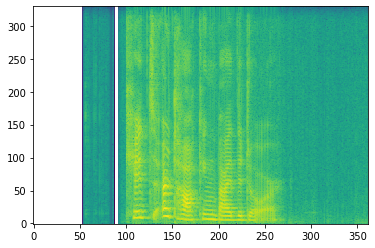

In [5]:
x, sr = librosa.load('RawData/03-01-01-01-01-01-02.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01) #nstep = 220
nwin  = int(sr * 0.03) #nwin = 661
nfft = nwin #nfft = 661

window = np.hamming(nwin) #returns hamming window
#Hamming window is a taper formed by using a weighted cosine

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep) #len(x) = 80195
#Sequence of numbers from nwin to len(x) in steps of nstep

X = np.zeros((len(nn), nfft//2))
#Returns a new array of given shape and type, filled with zeros

for i,n in enumerate(nn): #Creates an enumerate object for nn
    xseg = x[n-nwin:n]    #xseg = x[n-661: n]
    z = np.fft.fft(window * xseg, nfft)
#This function computes the one-dimensional n-point discrete Fourier Transform (DFT) 
#with the efficient Fast Fourier Transform (FFT) algorithm [CT]
    X[i,:] = np.log(np.abs(z[:nfft//2]))
#This step returns the natural logarithms of the absolute values of the array z[:330]

plt.imshow(X.T, interpolation='nearest', 
    origin='lower',
    aspect='auto') 
#The plt.imshow() funstion displays the data as an image; i.e. on a 2D regular raster
#The'nearest' interpolation is used if the image is upsampled by more than a factor of three 
#(i.e. the number of display pixels is at least three times the size of the data array)
#The aspect attribute controls the aspect ratio of the axes

plt.show()

In [6]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='01' and int(item[18:-4])%2==0:
        feeling_list.append('female_neutral')
    elif item[6:-16]=='01' and int(item[18:-4])%2==1:
        feeling_list.append('male_neutral')
    elif item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[6:-16]=='07' and int(item[18:-4])%2==0:
        feeling_list.append('female_disgust')
    elif item[6:-16]=='07' and int(item[18:-4])%2==1:
        feeling_list.append('male_disgust')
    elif item[6:-16]=='08' and int(item[18:-4])%2==0:
        feeling_list.append('female_surprised')
    elif item[6:-16]=='08' and int(item[18:-4])%2==1:
        feeling_list.append('male_surprised')

In [7]:
labels = pd.DataFrame(feeling_list)
#This step converts the feeling_list into a dataframe which is stored in the variable labels

# Getting the features of audio files using librosa

In [8]:
df = pd.DataFrame(columns=['feature'])
bookmark = 0
for index,y in enumerate(mylist):
    X, sample_rate = librosa.load('RawData/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    #Mel-frequency cepstral coefficients(MFCCs)
    feature = mfccs
    #[float(i) for i in feature]
    #feature1=feature[:135]
    df.loc[bookmark] = [feature]
    bookmark = bookmark + 1

In [9]:
df3 = pd.DataFrame(df['feature'].values.tolist())
#adds the values of the feature column of df into df3
newdf = pd.concat([df3,labels], axis=1)
#Concats the feature values of df3 with their respective emotions(which are stored in labels)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
#Used to rename the column from labels to 0
rnewdf = rnewdf.fillna(0)


In [106]:
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,-65.800972,...,-62.295246,-64.930115,-65.332123,-64.116928,-64.319908,-64.971420,-63.155781,-64.178665,-63.061893,male_neutral
1,-63.214199,-63.214199,-63.214199,-63.214199,-63.214199,-63.167271,-63.385483,-63.461838,-63.336159,-63.204266,...,-53.428589,-53.139488,-52.853867,-55.247734,-57.681992,-57.166061,-57.039677,-56.066059,-58.502811,female_neutral
2,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,-60.258648,...,-50.511299,-49.081509,-47.701057,-48.794907,-52.423771,-54.827961,-52.233273,-49.625141,-48.974827,male_neutral
3,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.488091,-66.526985,-66.554367,-66.534386,-66.488091,...,-62.121765,-64.443924,-65.315331,-65.285080,-65.365463,-64.970726,-64.157288,-64.912971,-66.488091,female_neutral
4,-60.262447,-60.367622,-64.739052,-66.271240,-61.207474,-60.241169,-62.637527,-63.144466,-60.526855,-59.101791,...,-54.735947,-50.871346,-51.928360,-56.388851,-57.152916,-54.602238,-54.803894,-60.359016,-64.784378,male_neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-60.593399,-60.593399,-60.593399,-60.593399,-60.593399,-60.593399,-60.593399,-60.593399,-60.593399,-60.587509,...,-56.475788,-57.265240,-58.290981,-58.079933,-59.773418,-59.014389,-58.443699,-59.228188,-60.244442,female_surprised
1436,-52.212467,-51.698601,-52.177299,-52.231358,-52.231358,-52.231358,-51.240921,-49.969334,-48.235863,-49.053085,...,-49.906879,-48.341267,-49.085781,-50.361027,-49.816654,-49.684631,-48.369240,-49.233719,-51.332947,male_surprised
1437,-54.730247,-54.271915,-54.867073,-55.418583,-55.418583,-55.347488,-54.419937,-53.393162,-52.852520,-53.651848,...,-49.948196,-51.924526,-50.193359,-49.905540,-52.408428,-54.794662,-54.162388,-51.946205,-51.275967,female_surprised
1438,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,-52.566399,-51.456364,-51.228733,-51.377647,...,-52.273594,-52.550968,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,-52.765701,male_surprised


# Dividing the data into test and train

In [10]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
#Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
#Here it is 0.8 or 80%
train = rnewdf[newdf1]
#Returns the training set
test = rnewdf[~newdf1]
#Returns the test set
#Test set happens to be the complement of training set

In [11]:
trainfeatures = train.iloc[:, :-1]
#Purely integer-location based indexing for selection by position
#trainfeatures is the training set that contains all the features
trainlabel = train.iloc[:, -1:]
#trainlabel is the second training set that contains the emotion name column(label) 
testfeatures = test.iloc[:, :-1]
#testfeatures is the test set that contains all the features
testlabel = test.iloc[:, -1:]
#testlabel is the second test set that contains the emotion name column(label)

In [12]:
#Creation of the training and the test sets
X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()
#LabelEncoder is used to encode target labels with value between 0 and n_classes-1

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#fit_transform() fits a label encoder and returns the encoded labels
#to_categorical() converts a class vector (integers) to a binary class matrix
y_test = np_utils.to_categorical(lb.fit_transform(y_test))
#We only need to convert y_train and y_test into binary matrix form 
#because they contain string values (emotion names)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Changing dimension for CNN model

In [13]:
x_traincnn = np.expand_dims(X_train, axis=2)
#expand_dims() expands the shape of an array
x_testcnn = np.expand_dims(X_test, axis=2)

In [14]:
model = Sequential()
#The Sequential class groups a linear stack of layers into a tf.keras.Model
model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
#1D convolution layer
#256 vectors and 5 dimensional vectors
model.add(Activation('relu'))
#Activation function to use
#'relu' applies the rectified linear unit activation function
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))  
model.add(MaxPooling1D(pool_size=(8)))
#Max pooling operation for 1D temporal data
#Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, 
#or largest, value in each patch of each feature map
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))
#'softmax' converts a real vector to a vector of categorical probabilities
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
#An optimizer is one of the two arguments required for compiling a Keras model
#Optimizer that implements the RMSprop algorithm

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.summary()
#Returns the summary of the model being used 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)          

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
#Specify the training configuration (optimizer, loss, metrics)

# Removed the whole training part for avoiding unnecessary long epochs list

In [17]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs = 700, validation_data=(x_testcnn, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1154 samples, validate on 286 samples
Epoch 1/700
1154/1154 [==============================] - 6s 5ms/step - loss: 2.9715 - accuracy: 0.0624 - val_loss: 2.8248 - val_accuracy: 0.0524
Epoch 2/700
1154/1154 [==============================] - 6s 5ms/step - loss: 2.7565 - accuracy: 0.0962 - val_loss: 2.7330 - val_accuracy: 0.1154
Epoch 3/700
1154/1154 [==============================] - 5s 5ms/step - loss: 2.7146 - accuracy: 0.1092 - val_loss: 2.7106 - val_accuracy: 0.1399
Epoch 4/700
1154/1154 [==============================] - 6s 5ms/step - loss: 2.6825 - accuracy: 0.1516 - val_loss: 2.6806 - val_accuracy: 0.1014
Epoch 5/700
1154/1154 [==============================] - 6s 5ms/step - loss: 2.6605 - accuracy: 0.1300 - val_loss: 2.6728 - val_accuracy: 0.1294
Epoch 6/700
1154/1154 [==============================] - 6s 5ms/step - loss: 2.6389 - accuracy: 0.1482 - val_loss: 2.6512 - val_accuracy: 0.1224
Epoch 7/700
1154/1154 [============

1154/1154 [==============================] - 5s 5ms/step - loss: 1.9437 - accuracy: 0.3449 - val_loss: 2.0574 - val_accuracy: 0.2797
Epoch 56/700
1154/1154 [==============================] - 5s 5ms/step - loss: 1.9328 - accuracy: 0.3423 - val_loss: 2.0197 - val_accuracy: 0.3252
Epoch 57/700
1154/1154 [==============================] - 5s 5ms/step - loss: 1.9244 - accuracy: 0.3518 - val_loss: 1.9870 - val_accuracy: 0.3182
Epoch 58/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.9161 - accuracy: 0.3553 - val_loss: 1.9908 - val_accuracy: 0.3112
Epoch 59/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.9159 - accuracy: 0.3440 - val_loss: 1.9844 - val_accuracy: 0.3007
Epoch 60/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.9062 - accuracy: 0.3397 - val_loss: 1.9738 - val_accuracy: 0.3112
Epoch 61/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.8935 - accuracy: 0.3510 - val_loss: 1.9574 - val_accuracy

1154/1154 [==============================] - 6s 5ms/step - loss: 1.6431 - accuracy: 0.4463 - val_loss: 1.8664 - val_accuracy: 0.3392
Epoch 112/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.6418 - accuracy: 0.4350 - val_loss: 1.8665 - val_accuracy: 0.3252
Epoch 113/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.6303 - accuracy: 0.4350 - val_loss: 1.8076 - val_accuracy: 0.3427
Epoch 114/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.6252 - accuracy: 0.4341 - val_loss: 1.8340 - val_accuracy: 0.3636
Epoch 115/700
1154/1154 [==============================] - 5s 5ms/step - loss: 1.6261 - accuracy: 0.4376 - val_loss: 1.8560 - val_accuracy: 0.3566
Epoch 116/700
1154/1154 [==============================] - 5s 5ms/step - loss: 1.6217 - accuracy: 0.4480 - val_loss: 1.8502 - val_accuracy: 0.3566
Epoch 117/700
1154/1154 [==============================] - 5s 5ms/step - loss: 1.6089 - accuracy: 0.4489 - val_loss: 1.8909 - val_ac

Epoch 167/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.4519 - accuracy: 0.5000 - val_loss: 1.7495 - val_accuracy: 0.3986
Epoch 168/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.4427 - accuracy: 0.5113 - val_loss: 1.7676 - val_accuracy: 0.3741
Epoch 169/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.4395 - accuracy: 0.5139 - val_loss: 1.7355 - val_accuracy: 0.4266
Epoch 170/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.4396 - accuracy: 0.5087 - val_loss: 1.8115 - val_accuracy: 0.3566
Epoch 171/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.4278 - accuracy: 0.5234 - val_loss: 1.8318 - val_accuracy: 0.3776
Epoch 172/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.4268 - accuracy: 0.5156 - val_loss: 1.8011 - val_accuracy: 0.3846
Epoch 173/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.4357 - accuracy: 0.4931 - val_loss: 1

Epoch 223/700
1154/1154 [==============================] - 5s 5ms/step - loss: 1.2841 - accuracy: 0.5546 - val_loss: 1.8310 - val_accuracy: 0.4021
Epoch 224/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.2761 - accuracy: 0.5763 - val_loss: 1.7957 - val_accuracy: 0.3916
Epoch 225/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.2795 - accuracy: 0.5685 - val_loss: 1.8361 - val_accuracy: 0.3322
Epoch 226/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.2814 - accuracy: 0.5719 - val_loss: 1.7690 - val_accuracy: 0.3636
Epoch 227/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.2661 - accuracy: 0.5685 - val_loss: 1.7517 - val_accuracy: 0.3951
Epoch 228/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.2679 - accuracy: 0.5615 - val_loss: 1.7375 - val_accuracy: 0.3916
Epoch 229/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.2643 - accuracy: 0.5797 - val_loss: 1

Epoch 279/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.1190 - accuracy: 0.6213 - val_loss: 1.7608 - val_accuracy: 0.3916
Epoch 280/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.1218 - accuracy: 0.6378 - val_loss: 1.7853 - val_accuracy: 0.3986
Epoch 281/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.1239 - accuracy: 0.6282 - val_loss: 1.7739 - val_accuracy: 0.3951
Epoch 282/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.1215 - accuracy: 0.6239 - val_loss: 1.7730 - val_accuracy: 0.3741
Epoch 283/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.1079 - accuracy: 0.6378 - val_loss: 1.7565 - val_accuracy: 0.3951
Epoch 284/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.1113 - accuracy: 0.6369 - val_loss: 1.7807 - val_accuracy: 0.3846
Epoch 285/700
1154/1154 [==============================] - 6s 5ms/step - loss: 1.1044 - accuracy: 0.6308 - val_loss: 1

Epoch 335/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.9704 - accuracy: 0.6854 - val_loss: 1.8084 - val_accuracy: 0.3916
Epoch 336/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.9710 - accuracy: 0.6854 - val_loss: 1.8572 - val_accuracy: 0.3636
Epoch 337/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.9698 - accuracy: 0.6794 - val_loss: 1.7825 - val_accuracy: 0.4161
Epoch 338/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.9668 - accuracy: 0.6768 - val_loss: 1.7981 - val_accuracy: 0.4021
Epoch 339/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.9647 - accuracy: 0.6802 - val_loss: 1.7892 - val_accuracy: 0.4231
Epoch 340/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.9596 - accuracy: 0.6828 - val_loss: 1.8438 - val_accuracy: 0.3636
Epoch 341/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.9501 - accuracy: 0.6906 - val_loss: 1

Epoch 391/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.8320 - accuracy: 0.7296 - val_loss: 1.8504 - val_accuracy: 0.3811
Epoch 392/700
1154/1154 [==============================] - 9s 8ms/step - loss: 0.8262 - accuracy: 0.7357 - val_loss: 1.8532 - val_accuracy: 0.3916
Epoch 393/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.8181 - accuracy: 0.7400 - val_loss: 1.8002 - val_accuracy: 0.4126
Epoch 394/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.8264 - accuracy: 0.7392 - val_loss: 1.8237 - val_accuracy: 0.3986
Epoch 395/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.8161 - accuracy: 0.7392 - val_loss: 1.7911 - val_accuracy: 0.4231
Epoch 396/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.8158 - accuracy: 0.7288 - val_loss: 1.7896 - val_accuracy: 0.4161
Epoch 397/700
1154/1154 [==============================] - 6s 6ms/step - loss: 0.8075 - accuracy: 0.7392 - val_loss: 1

Epoch 447/700
1154/1154 [==============================] - 6s 6ms/step - loss: 0.6922 - accuracy: 0.7981 - val_loss: 1.9323 - val_accuracy: 0.3986
Epoch 448/700
1154/1154 [==============================] - 6s 6ms/step - loss: 0.6890 - accuracy: 0.7860 - val_loss: 1.8582 - val_accuracy: 0.3881
Epoch 449/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.6866 - accuracy: 0.7964 - val_loss: 1.8700 - val_accuracy: 0.3951
Epoch 450/700
1154/1154 [==============================] - 6s 6ms/step - loss: 0.6840 - accuracy: 0.7938 - val_loss: 1.9438 - val_accuracy: 0.3951
Epoch 451/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.6832 - accuracy: 0.7938 - val_loss: 1.8807 - val_accuracy: 0.3916
Epoch 452/700
1154/1154 [==============================] - 6s 6ms/step - loss: 0.6786 - accuracy: 0.7929 - val_loss: 1.9163 - val_accuracy: 0.3881
Epoch 453/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.6809 - accuracy: 0.7886 - val_loss: 1

1154/1154 [==============================] - 6s 6ms/step - loss: 0.5681 - accuracy: 0.8414 - val_loss: 1.9405 - val_accuracy: 0.4196
Epoch 503/700
1154/1154 [==============================] - 6s 6ms/step - loss: 0.5596 - accuracy: 0.8397 - val_loss: 2.0883 - val_accuracy: 0.3951
Epoch 504/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.5600 - accuracy: 0.8466 - val_loss: 1.9829 - val_accuracy: 0.4091
Epoch 505/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.5563 - accuracy: 0.8440 - val_loss: 1.9746 - val_accuracy: 0.4056
Epoch 506/700
1154/1154 [==============================] - 8s 7ms/step - loss: 0.5547 - accuracy: 0.8293 - val_loss: 1.9702 - val_accuracy: 0.3916
Epoch 507/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.5532 - accuracy: 0.8449 - val_loss: 1.9450 - val_accuracy: 0.4126
Epoch 508/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.5440 - accuracy: 0.8484 - val_loss: 1.9635 - val_ac

Epoch 558/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.4421 - accuracy: 0.8899 - val_loss: 2.0704 - val_accuracy: 0.3881
Epoch 559/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.4299 - accuracy: 0.8778 - val_loss: 2.1302 - val_accuracy: 0.4161
Epoch 560/700
1154/1154 [==============================] - 5s 5ms/step - loss: 0.4323 - accuracy: 0.8865 - val_loss: 2.1512 - val_accuracy: 0.3951
Epoch 561/700
1154/1154 [==============================] - 5s 5ms/step - loss: 0.4388 - accuracy: 0.8839 - val_loss: 2.0705 - val_accuracy: 0.3986
Epoch 562/700
1154/1154 [==============================] - 5s 5ms/step - loss: 0.4322 - accuracy: 0.8943 - val_loss: 2.1558 - val_accuracy: 0.4126
Epoch 563/700
1154/1154 [==============================] - 5s 5ms/step - loss: 0.4320 - accuracy: 0.8882 - val_loss: 2.0775 - val_accuracy: 0.4091
Epoch 564/700
1154/1154 [==============================] - 5s 5ms/step - loss: 0.4287 - accuracy: 0.8830 - val_loss: 2

Epoch 614/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.3327 - accuracy: 0.9237 - val_loss: 2.2052 - val_accuracy: 0.4196
Epoch 615/700
1154/1154 [==============================] - 7s 6ms/step - loss: 0.3295 - accuracy: 0.9255 - val_loss: 2.3015 - val_accuracy: 0.3776
Epoch 616/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.3281 - accuracy: 0.9237 - val_loss: 2.1712 - val_accuracy: 0.4266
Epoch 617/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.3288 - accuracy: 0.9133 - val_loss: 2.2621 - val_accuracy: 0.3916
Epoch 618/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.3211 - accuracy: 0.9246 - val_loss: 2.1795 - val_accuracy: 0.4161
Epoch 619/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.3189 - accuracy: 0.9307 - val_loss: 2.2475 - val_accuracy: 0.3916
Epoch 620/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.3141 - accuracy: 0.9289 - val_loss: 2

Epoch 670/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.2266 - accuracy: 0.9532 - val_loss: 2.3947 - val_accuracy: 0.3846
Epoch 671/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.2226 - accuracy: 0.9636 - val_loss: 2.3638 - val_accuracy: 0.4056
Epoch 672/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.2255 - accuracy: 0.9558 - val_loss: 2.3406 - val_accuracy: 0.4161
Epoch 673/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.2249 - accuracy: 0.9532 - val_loss: 2.4284 - val_accuracy: 0.4056
Epoch 674/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.2208 - accuracy: 0.9627 - val_loss: 2.5424 - val_accuracy: 0.4056
Epoch 675/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.2201 - accuracy: 0.9619 - val_loss: 2.3492 - val_accuracy: 0.4056
Epoch 676/700
1154/1154 [==============================] - 6s 5ms/step - loss: 0.2178 - accuracy: 0.9636 - val_loss: 2

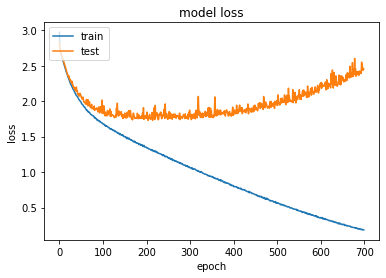

In [18]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Saving the model

In [19]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
#Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\HP\Desktop\Mini-Project\saved_models\Emotion_Voice_Detection_Model.h5 


In [20]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Loading the model

In [21]:
# loading json and creating model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 39.86%


# Predicting emotions on the test data

In [22]:
preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)
preds1 = preds.argmax(axis=1)
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})

286/286 [==============================] - 0s 1ms/step


In [23]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))
actualdf = pd.DataFrame({'actualvalues': actualvalues})

# Actual v/s Predicted emotions

In [24]:
finaldf = actualdf.join(preddf)

In [25]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,22
female_calm,19
female_disgust,14
female_fearful,21
female_happy,18
female_neutral,8
female_sad,18
female_surprised,25
male_angry,23


In [26]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,21
female_calm,11
female_disgust,22
female_fearful,23
female_happy,20
female_neutral,12
female_sad,20
female_surprised,14
male_angry,21


In [27]:
finaldf.to_csv('Predictions.csv', index = False)

# Live Demo

In [107]:
data, sampling_rate = librosa.load('output1.wav')

Populating the interactive namespace from numpy and matplotlib


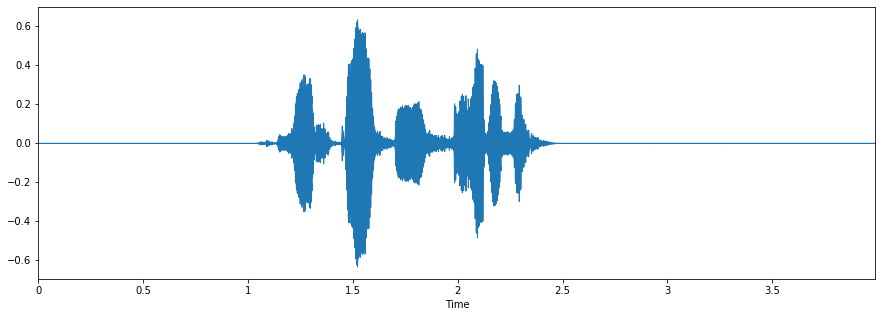

In [108]:
%pylab inline
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [109]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output1.wav', res_type='kaiser_fast', duration=2.5, sr=22050*2, offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [110]:
livedf2 = pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T
twodim= np.expand_dims(livedf2, axis=2)
livepreds = loaded_model.predict(twodim, batch_size=32, verbose=1)

1/1 [==============================] - 0s 5ms/step


In [111]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
livepredictions = (lb.inverse_transform((liveabc)))

In [112]:
livepredictions

array(['male_angry'], dtype=object)